### Load env variables

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

### Getting stock images

In [2]:
from pexels_api import API
import os

# Create API object
api = API(os.getenv('PEXELS_API_KEY'))

# Search for photos
api.search('kitten', page=1, results_per_page=5)

# Get photo entries
photos = api.get_entries()

for photo in photos:
  # Print photographer
  print('Photographer: ', photo.photographer)
  # Print url
  print('Photo url: ', photo.url)
  # Print original size url
  print('Photo original size: ', photo.original)

Photographer:  Pixabay
Photo url:  https://www.pexels.com/photo/close-up-photo-of-cute-sleeping-cat-416160/
Photo original size:  https://images.pexels.com/photos/416160/pexels-photo-416160.jpeg
Photographer:  Pixabay
Photo url:  https://www.pexels.com/photo/white-and-grey-kitten-on-brown-and-black-leopard-print-textile-45201/
Photo original size:  https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg
Photographer:  Larissa Barbosa
Photo url:  https://www.pexels.com/photo/close-up-photography-of-brown-and-white-kitten-1870376/
Photo original size:  https://images.pexels.com/photos/1870376/pexels-photo-1870376.jpeg
Photographer:  Cats Coming
Photo url:  https://www.pexels.com/photo/close-up-photo-of-person-holding-white-kitten-1444321/
Photo original size:  https://images.pexels.com/photos/1444321/pexels-photo-1444321.jpeg
Photographer:  Pixabay
Photo url:  https://www.pexels.com/photo/orange-tabby-cat-lying-on-floor-290164/
Photo original size:  https://images.pexels.c

In [3]:
from pexels_api import API
from pexels_api.tools import Photo
import os
from typing import List


def get_photos(search_term: str, page=1, results_per_page=1) -> List[Photo]:
  api = API(os.getenv('PEXELS_API_KEY'))
  api.search(search_term, page=page, results_per_page=results_per_page)
  photos = api.get_entries()
  return photos

### Downloading stock images

In [5]:
import requests
import os

def download_image(photo: Photo, output_dir: str = os.getcwd()) -> str:
    # Get the image content
    response = requests.get(photo.large, allow_redirects=True)

    # Save the image content to a file
    filename = os.path.join(output_dir, f"{photo.id}.{photo.extension}")
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
    else:
        raise Exception("Failed to retrieve image.")
    
    return filename

In [8]:
photo = get_photos('space')[0]
path = download_image(photo, os.path.join(os.getcwd(), 'images'))

### Resizing images for video compatibility

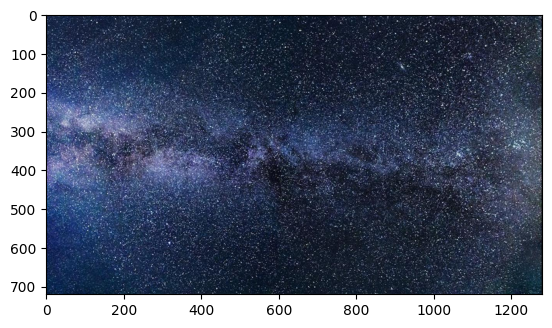

In [13]:
# Show the original image
from PIL import Image
import matplotlib.pyplot as plt

input_image_path = os.path.join('images', os.listdir('images')[0])

img = Image.open(input_image_path)
plt.imshow(img)

In [11]:
from PIL import Image

def resize_image(image_path, output_image_path, target_size):
    """Resize the image to the target size and pad the resized image with black color.

    Args:
        image_path (str): The path to the image file.
        output_image_path (str): The path to save the resized image.
        target_size (Tuple[int, int]): A tuple of the target width and height.
    """
    with Image.open(image_path) as img:
        # Calculate the new size preserving the aspect ratio
        img_ratio = img.width / img.height
        target_ratio = target_size[0] / target_size[1]
        if target_ratio > img_ratio:
            new_height = target_size[1]
            new_width = int(new_height * img_ratio)
        else:
            new_width = target_size[0]
            new_height = int(new_width / img_ratio)
        
        # Resize the image
        img = img.resize((new_width, new_height))
        
        # Create a new image with black background
        new_img = Image.new("RGB", target_size)
        # Calculate position to paste resized image
        top_left_x = (target_size[0] - new_width) // 2
        top_left_y = (target_size[1] - new_height) // 2
        new_img.paste(img, (top_left_x, top_left_y))
        
        # Save the padded image
        new_img.save(output_image_path)
    
    return output_image_path

# Example usage
resize_image(input_image_path, input_image_path, (1280, 720))

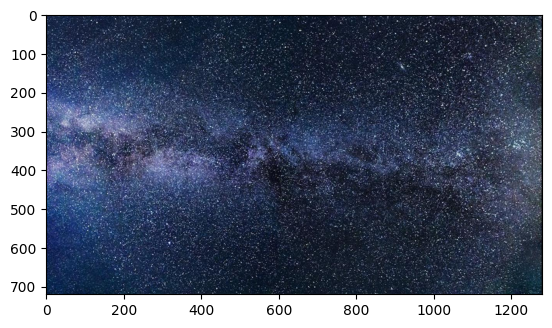

In [12]:
# Show the original image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(input_image_path)
plt.imshow(img)